<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/Image_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 증강 연습

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## ImageDataGenerator 생성

### Train Generator

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')

In [31]:
train_generator = train_datagen.flow_from_directory(
    "/content/gdrive/MyDrive/Study/Everyone's DeepLearning/run_project/train",
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


### Test Generator

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
test_generator = test_datagen.flow_from_directory(
    "/content/gdrive/MyDrive/Study/Everyone's DeepLearning/run_project/test",
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


## Model 생성

In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_20 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_21 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                 

In [44]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0002), 
              metrics=['accuracy'])

In [45]:
# 모델 실행
history = model.fit(train_generator,
                    steps_per_epoch=32,
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=24)

Epoch 1/20
32/32 [==============================] - 2s 57ms/step - loss: 0.7021 - accuracy: 0.5312 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 2s 51ms/step - loss: 0.6855 - accuracy: 0.5312 - val_loss: 0.6771 - val_accuracy: 0.5500
Epoch 3/20
32/32 [==============================] - 2s 61ms/step - loss: 0.6903 - accuracy: 0.5625 - val_loss: 0.6744 - val_accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 3s 82ms/step - loss: 0.6668 - accuracy: 0.6000 - val_loss: 0.6534 - val_accuracy: 0.5750
Epoch 5/20
32/32 [==============================] - 2s 50ms/step - loss: 0.6688 - accuracy: 0.5813 - val_loss: 0.6336 - val_accuracy: 0.5917
Epoch 6/20
32/32 [==============================] - 2s 50ms/step - loss: 0.6284 - accuracy: 0.6812 - val_loss: 0.5750 - val_accuracy: 0.7667
Epoch 7/20
32/32 [==============================] - 2s 50ms/step - loss: 0.5908 - accuracy: 0.7063 - val_loss: 0.5665 - val_accuracy: 0.7583
Epoch 8/20
32

## 결과를 그래프로 표현

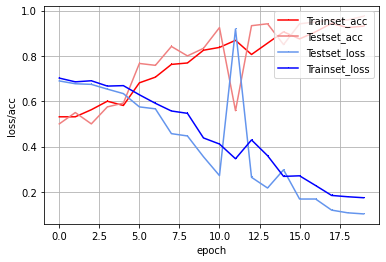

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, acc, marker=',', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker=',', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker=',', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()